In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rand_seed = 12


# Preprocessing

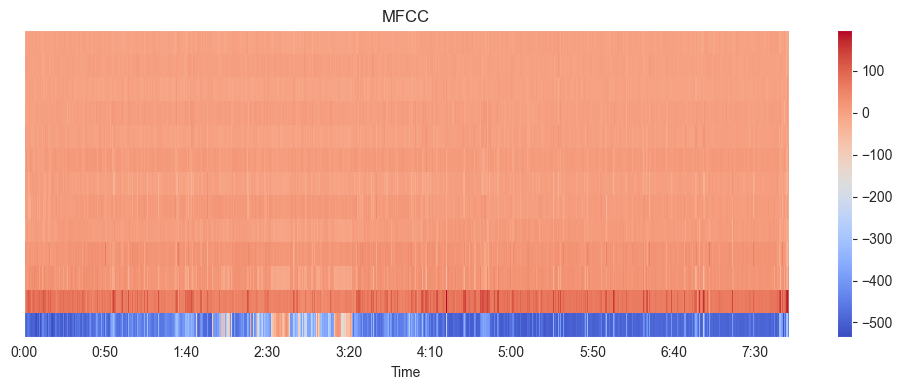

Audio Features:
[-4.20819550e+02  7.24609680e+01  1.65533581e+01  2.06047497e+01
  7.01723480e+00  8.18255997e+00 -4.59687188e-02  9.26527500e+00
  7.32438266e-01  3.74826837e+00 -2.62143230e+00  6.28852367e-01
 -1.94584024e+00  5.26658356e-01  3.86433154e-01  3.45075577e-01
  3.39114279e-01  3.33151072e-01  3.90551120e-01  4.13661867e-01
  3.03459585e-01  3.54784578e-01  4.88707840e-01  5.68804979e-01
  7.44318485e-01  9.17879363e-02]
Shape of Audio Features: (26,)


In [2]:
# # Load the audio file
# audio_path = 'data_audio/300_AUDIO.wav'
# y, sr = librosa.load(audio_path)
# 
# # # Extract audio features
# mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
# chroma = librosa.feature.chroma_stft(y=y, sr=sr)
# zcr = librosa.feature.zero_crossing_rate(y)
# 
# # Aggregate the features (mean, std, etc.)
# mfccs_mean = np.mean(mfccs, axis=1)
# chroma_mean = np.mean(chroma, axis=1)
# zcr_mean = np.mean(zcr, axis=1)

audio_features = np.concatenate((mfccs_mean, chroma_mean, zcr_mean), axis=0)

def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract various features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    
    # Aggregate the features
    mfccs_mean = np.mean(mfccs, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    zcr_mean = np.mean(zcr, axis=1)

    # Visualize MFCC features
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()
    
    return np.concatenate((mfccs_mean, chroma_mean, zcr_mean), axis=0)

audio_path = 'data_audio/300_AUDIO.wav'
audio_features = extract_audio_features(audio_path)

print("Audio Features:")
print(audio_features)
print("Shape of Audio Features:", audio_features.shape)



In [ ]:
for i in df_audio_files:
    df_AUDIO = preprocess_AUDIO(i.AUDIO)
    df_FORMANT = preprocess_FORMANT(i.FORMANT)
    df_COVAREP = preprocess_COVAREP(i.COVAREP)

In [3]:
# # Load COVAREP features
# covarep_path = 'data_audio/300_COVAREP.csv'
# covarep_features = pd.read_csv(covarep_path)

# # Load FORMANT features
# formant_path = 'data_audio/300_FORMANT.csv'
# formant_features = pd.read_csv(formant_path)

# # Combine features
# all_features = np.concatenate((audio_features, covarep_features.values.flatten(), formant_features.values.flatten()), axis=0)

# Load COVAREP features
covarep_path = 'data_audio/300_COVAREP.csv'
covarep_features = pd.read_csv(covarep_path)

# Load FORMANT features
formant_path = 'data_audio/300_FORMANT.csv'
formant_features = pd.read_csv(formant_path)

print("COVAREP Features:")
print(covarep_features.describe())
print("Shape of COVAREP Features:", covarep_features.shape)

print("FORMANT Features:")
print(formant_features.describe())
print("Shape of FORMANT Features:", formant_features.shape)

# Combine features
all_features = np.concatenate((audio_features, covarep_features.values.flatten(), formant_features.values.flatten()), axis=0)

print("Combined Features:")
print(all_features)
print("Shape of Combined Features:", all_features.shape)


COVAREP Features:
                  0           0.1           0.2           0.3           0.4  \
count  64850.000000  64850.000000  64850.000000  64850.000000  64850.000000   
mean     177.047787      0.429607      0.065698      0.216219      1.198081   
std       62.349634      0.495024      0.061847      0.188564      5.673704   
min        0.000000      0.000000      0.000000      0.000000    -50.079000   
25%      120.500000      0.000000      0.009259      0.035653     -0.088248   
50%      165.500000      0.000000      0.050100      0.183850      0.082006   
75%      218.000000      1.000000      0.109217      0.361617      3.961700   
max      348.000000      1.000000      0.314340      0.829170     33.046000   

                0.5           0.6           0.7           0.8           0.9  \
count  64850.000000  64850.000000  64850.000000  64850.000000  64850.000000   
mean       0.203747      0.115919     -0.323579      1.445487      0.529616   
std        0.196659      0.030027

# Exploratory data analysis

In [4]:
# Print the shape of the features
print(f'Audio features shape: {audio_features.shape}')
print(f'COVAREP features shape: {covarep_features.shape}')
print(f'FORMANT features shape: {formant_features.shape}')
print(f'Combined features shape: {all_features.shape}')


# # Assuming combined features are in a dataframe for visualization
# feature_names = ['mfcc_' + str(i) for i in range(13)] + \
#                 ['chroma_' + str(i) for i in range(12)] + \
#                 ['zcr'] + \
#                 covarep_features.columns.tolist() + \
#                 formant_features.columns.tolist()

# combined_features_df = pd.DataFrame([all_features], columns=feature_names)

# # Visualize feature distributions
# plt.figure(figsize=(20, 10))
# sns.boxplot(data=combined_features_df)
# plt.xticks(rotation=90)
# plt.title('Feature Distributions')
# plt.show()


Audio features shape: (26,)
COVAREP features shape: (64850, 74)
FORMANT features shape: (64849, 5)
Combined features shape: (5123171,)


# Train test split

In [5]:
# Assume we have a dataset with more samples
# Example: features = np.array([all_features_1, all_features_2, ...])
# Example: labels = np.array([label_1, label_2, ...])

features = np.array([all_features, all_features, all_features])  # Replace with actual feature array
labels = np.array([0, 1, 0])  # Replace with actual labels


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=rand_seed)


print("Train Test Split:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Train Test Split:
X_train shape: (2, 5123171), y_train shape: (2,)
X_test shape: (1, 5123171), y_test shape: (1,)


# Creating the pipeline & hyperparameter tuning

In [6]:
from sklearn.model_selection import StratifiedKFold

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define the hyperparameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Use StratifiedKFold for cross-validation
stratified_kf = StratifiedKFold(n_splits=2)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kf, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define the hyperparameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


# Evaluation

In [ ]:
# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluation
accuracy = grid_search.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
